In [28]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 141), (586, 141), (2341, 1), (586, 1))

# Neural Network

In [29]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=141, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

model.fit(x=X_train, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 0s 1ms/step - loss: 187.5466
Epoch 2/500
74/74 [==============================] - 0s 2ms/step - loss: 173.2969
Epoch 3/500
74/74 [==============================] - 0s 2ms/step - loss: 159.2151
Epoch 4/500
74/74 [==============================] - 0s 1ms/step - loss: 143.0338
Epoch 5/500
74/74 [==============================] - 0s 1ms/step - loss: 124.0465
Epoch 6/500
74/74 [==============================] - 0s 1ms/step - loss: 104.9520
Epoch 7/500
74/74 [==============================] - 0s 1ms/step - loss: 86.5266
Epoch 8/500
74/74 [==============================] - 0s 1ms/step - loss: 69.0258
Epoch 9/500
74/74 [==============================] - 0s 1ms/step - loss: 53.7556
Epoch 10/500
74/74 [==============================] - 0s 1ms/step - loss: 42.8831
Epoch 11/500
74/74 [==============================] - 0s 1ms/step - loss: 35.5968
Epoch 12/500
74/74 [==============================] - 0s 1ms/step - loss: 30.2824
Epoch 13/500
74/74 

In [30]:
model.evaluate(X_train, Y_train)
train_pre = model.predict(X_train)

74/74 [==============================] - 0s 798us/step


In [31]:
model.evaluate(X_test, Y_test)
test_pre = model.predict(X_test)

19/19 [==============================] - 0s 833us/step


Text(0, 0.5, 'Sale_Price')

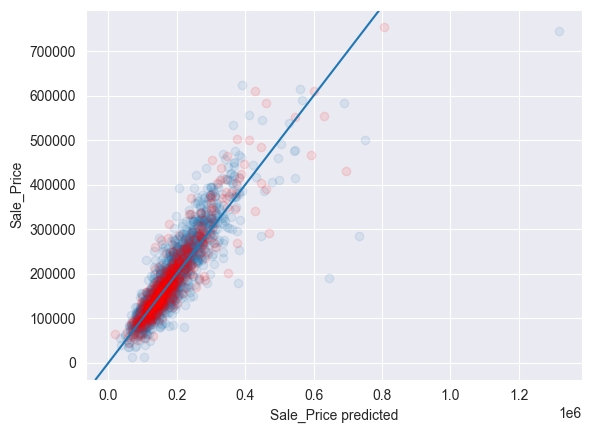

In [32]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')